#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

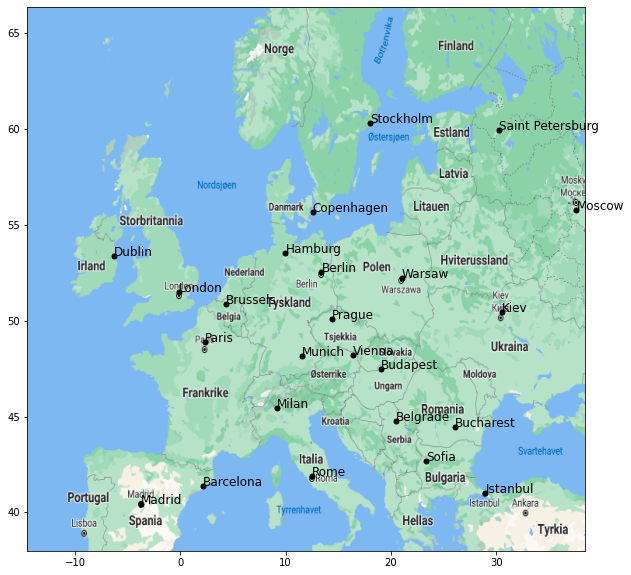

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


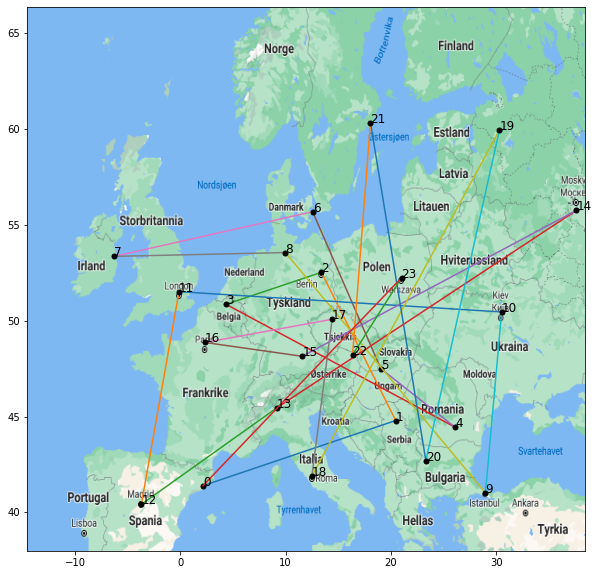

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

time spent using 6 number of cities is:  0.0 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona'], distance is 5018.81
time spent using 7 number of cities is:  0.003994941711425781 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona'], distance is 5487.89
time spent using 8 number of cities is:  0.03195524215698242 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona'], distance is 6667.49
time spent using 9 number of cities is:  0.28761744499206543 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona'], distance is 6678.55
time spent using 10 number of cities is:  2.6484625339508057 . Best route is: ['Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona'], distance is 7486.3099999999995


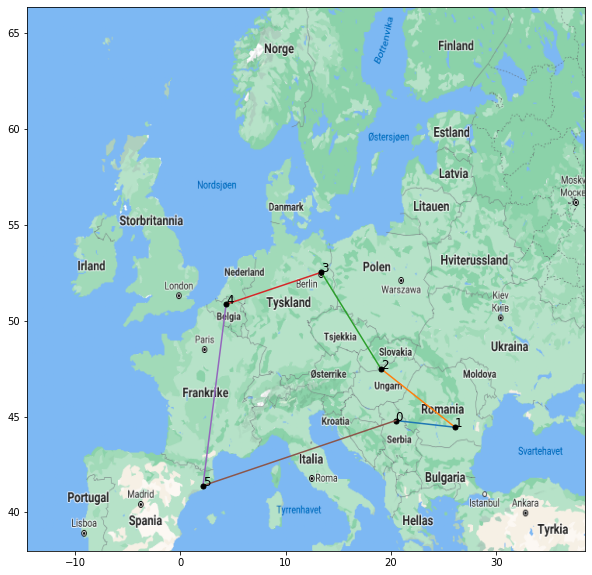

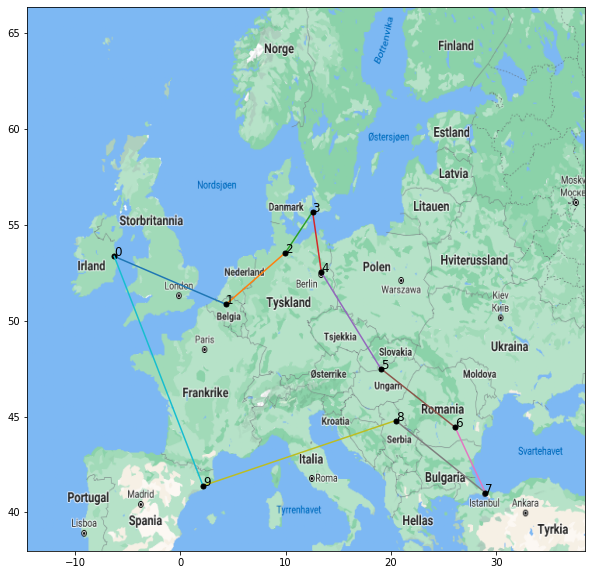

In [5]:
# Implement the algorithm here
import itertools 
import time

#Making a dictionary to easily find the index belonging to each city in the data set
city_idx_dic = {}
for i in range(len(data[0])):
    city_idx_dic[data[0][i]] = i

"""
Function for calculating the total distance of a route.
----------
Parameters
----------
sub_cities: list of city names in route order.
"""
def calc_distance(sub_cities):
    total_dist = 0
    for i in range(len(sub_cities) - 1):
        city = sub_cities[i] #city 1
        next_city = sub_cities[i+1] #city 2
        idx_current = city_idx_dic[city] #idx of city 1
        idx_next = city_idx_dic[next_city] #idx of city 2
        dist = data[idx_current + 1][idx_next] #finding distance in data set
        total_dist += float(dist)
    #Calculate distance between last and first city
    city = sub_cities[-1]
    next_city = sub_cities[0]
    idx_current = city_idx_dic[city]
    idx_next = city_idx_dic[next_city]
    dist = data[idx_current + 1][idx_next]
    total_dist += float(dist)
    
    return total_dist

"""
Function for checking every possible route between a list of cities, and returning
the one with shortest path.
----------
Parameters
----------
cities: list of city names we want to find routes between.
best: distance value of the current list we input.
"""
def exhaustive_search(cities, best):
    best_route = cities
    #sneeky method to cut down from n! to (n-1)! Removes one city and appends it later
    start = cities[0]
    sub_cities = cities[1:]
    possibilities = list(itertools.permutations(sub_cities)) #finding all routes
    for route in possibilities:
        route = list(route)
        route.append(start)
        dist = calc_distance(route)
        if dist < best:
            best = dist
            best_route = route
    return best_route, best

#For-loop to calculate time spent on 6-10 first cities
for i in range(6,11):

    sub_cities = (list(city_coords)[:i])
    best = calc_distance(sub_cities)
    
    start = time.time()
    
    best_route, distance = exhaustive_search(sub_cities, best)
    
    end = time.time()
    print(f"time spent using {i} number of cities is: ",end - start, f". Best route is: {best_route}, distance is {distance}")
    
    if (i == 6 or i == 10):
        plot_plan(best_route)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [6]:
"""
Output example:
time spent using 6 number of cities is:  0.000995635986328125 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona'], distance is 5018.81
time spent using 7 number of cities is:  0.003988981246948242 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona'], distance is 5487.89
time spent using 8 number of cities is:  0.02989339828491211 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona'], distance is 6667.49
time spent using 9 number of cities is:  0.2752645015716553 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona'], distance is 6678.55
time spent using 10 number of cities is:  2.7958836555480957 . Best route is: ['Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona'], distance is 7486.3099999999995
"""

#We can see that exhaustive search uses approximetly 10 times more time for each new city added.
#24 cities would therefore take approximetly 27*10^13 seconds, which is impossibly long.
#In reality, it would be way more than this, since our algorithm uses (n-1)! different possible routes and calculates their
#lengths, therefore the time spent will eventually grow a lot more than 10x for each new city.

"\nOutput example:\ntime spent using 6 number of cities is:  0.000995635986328125 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona'], distance is 5018.81\ntime spent using 7 number of cities is:  0.003988981246948242 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona'], distance is 5487.89\ntime spent using 8 number of cities is:  0.02989339828491211 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona'], distance is 6667.49\ntime spent using 9 number of cities is:  0.2752645015716553 . Best route is: ['Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona'], distance is 6678.55\ntime spent using 10 number of cities is:  2.7958836555480957 . Best route is: ['Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Bucharest', 'Istanbul', 'Belgrade', 'Barcelona'], distance is 748

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

best distance for 10 cities: 7486.309999999999
best distance for all cities: 12437.65


worst distance for 10 cities: 7737.950000000001
worst distance for all cities: 16219.25


Average distance for 10 cities: 7580.260500000001
Average distance for all cities: 14406.412500000002


Standard deviation for 10 cities: 115.90906498091513
Standard deviation for all cities: 989.0132742783331


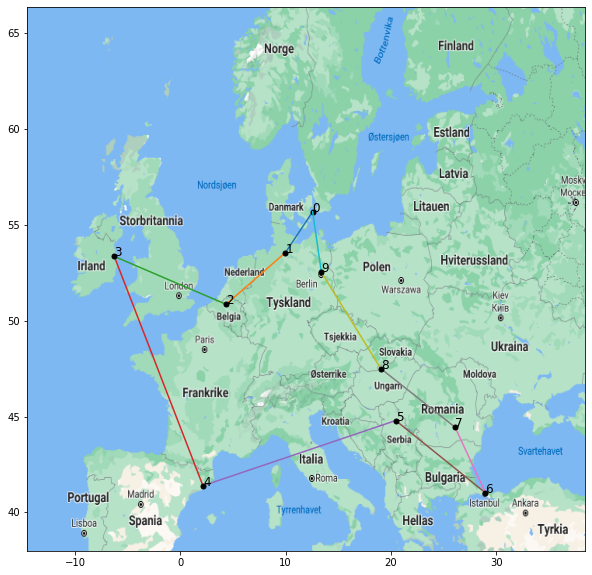

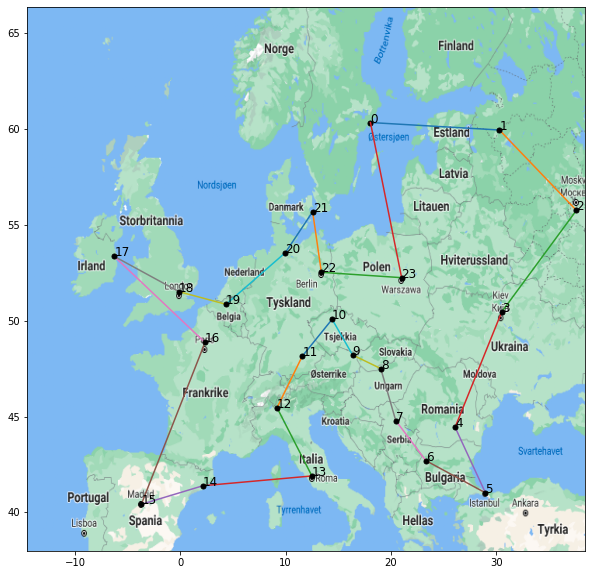

In [51]:
# Implement the algorithm here

#Function that swaps a and b
def swap(a,b):
    return b,a

"""
Function for finding the best neighbour to a city.
----------
Parameters
----------
city: name of city we want to find best neighbour to.
route: our current route, which is a list of city names
"""
def getBestNeighbour(city, route):
    bestDistance = calc_distance(route)
    length = len(route)
    #Finding the idx of city in route
    for i in range(length):
        if route[i] == city:
            city_idx = i
            
    #Checking for every city, except for the input city and its left-neighbour
    for i in range(length):
        if ((i != city_idx) and (i != city_idx - 1)):
            temp_route = route.copy()
            temp_route[i], temp_route[city_idx - 1] = swap(temp_route[i], temp_route[city_idx - 1])
            tempDistance = calc_distance(temp_route)
            if (tempDistance < bestDistance):
                bestDistance = tempDistance
                route = temp_route
                
    return route, bestDistance          
        
    
"""
Function for finding one of the best possible routes.
----------
Parameters
----------
city_list: our current route, which is a list of city names.
"""
def hillClimbing(city_list):
    temp_cities = city_list.copy()
    np.random.shuffle(temp_cities)
        
    currentRoute = temp_cities
    currentLength = calc_distance(temp_cities)
    
    bestRoute = temp_cities
    bestLength = 10**10
    
    #a while loop to see if we found a better solution
    while(currentLength < bestLength):
        bestLength = currentLength
        bestRoute = currentRoute
        
        #Scrambling the order of cities checked to not get same result every time
        scramble_route = bestRoute.copy()
        np.random.shuffle(scramble_route)
        
        for rand_city in scramble_route:
            currentRoute, currentLength = getBestNeighbour(rand_city, currentRoute)
            
    return bestRoute, bestLength


dist_list_24 = []
dist_list_10 = []

route_list_24 = []
route_list_10 = []

sub_cities = cities[:10]

#Calling on HC (Hill climbing) 20 times for 10 and 24 cities, and storing the routes and distances.
for i in range(20):
    route24, dist24 = hillClimbing(cities)
    route10, dist10 = hillClimbing(sub_cities)
    
    dist_list_24.append(dist24)
    dist_list_10.append(dist10)
    
    route_list_24.append(route24)
    route_list_10.append(route10)
    
    for city in sub_cities:
        if city not in route10:
            print(city, "not found")
    
    for city in cities:
        if city not in route24:
            print(city, "not found")
            
print("best distance for 10 cities:", np.min(dist_list_10))
print("best distance for all cities:", np.min(dist_list_24))
print("\n")
print("worst distance for 10 cities:", np.max(dist_list_10))
print("worst distance for all cities:", np.max(dist_list_24))
print("\n")
print("Average distance for 10 cities:", np.mean(dist_list_10))
print("Average distance for all cities:", np.mean(dist_list_24))
print("\n")
print("Standard deviation for 10 cities:", np.std(dist_list_10))
print("Standard deviation for all cities:", np.std(dist_list_24))

idx_10 = np.argmin(dist_list_10)
idx_24 = np.argmin(dist_list_24)

plot_plan(route_list_10[idx_10])
plot_plan(route_list_24[idx_24])




## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [34]:

"""
Function for Partially mapped crossover.
----------
Parameters
----------
a,b: list of integers. Has to be equal size. Will perform pmx on these two lists
"""
def pmx(a,b):
    length = len(a)
    dic_a = {}
    dic_b = {}
    
    for i in range(length):
        dic_a[a[i]] = i
        dic_b[b[i]] = i
        

    
    index = np.random.choice(len(a), 2, replace=False)
    idx_start = np.min(index)
    idx_end = np.max(index)
    child = [None]*len(a)
    
    #For testing purposes
    idx_start = 2
    idx_end = 5
    
    child[idx_start:idx_end+1] = a[idx_start:idx_end+1] #our start region. This is the main focus of pmx
    
    for i in range(idx_start, idx_end+1):
        if b[i] not in child:
            b_numb = b[i]
            a_numb = a[i]
            if child[dic_b[a_numb]] == None:
                child[dic_b[a_numb]] = b_numb 
                
            else:
                #While statment that will loop until we are out of the partially mapped region (start region)
                bounce = True
                while(bounce):
                    k = dic_b[a_numb]
                    a_numb = a[k]
                    b_numb = b[k]
                    if child[dic_b[a_numb]] == None:
                        child[dic_b[a_numb]] = b[i]
                        
                        bounce = False
    
     
    for i in range(length):
        if child[i] == None:
            child[i] = b[i]
            
    return child

#Function for getting two children out of pmx
def pmx_pair(a,b):
    child1 = pmx(a,b)
    child2 = pmx(b,a)
    return child1, child2

#Function that allows us to use pmx on any two lists with identical elements, that dont have to be integers.
def pmx_cities(list1,list2):
    a = list1.copy()
    b = list2.copy()
    length = len(a)
    city_to_number = {} #dictionary to convert from city (or any other element) to a integer
    number_to_city = {} #dictionary to convert from integer back to city (or the given element)
    numb_list_a = [None]*length
    numb_list_b = [None]*length
    
    for i in range(length):
        city_to_number[a[i]] = i+1
        number_to_city[i+1] = a[i]
        
    for i in range(length):
        numb_list_a[i] = city_to_number[a[i]]
        numb_list_b[i] = city_to_number[b[i]]
    
    numb_list_a, numb_list_b = pmx_pair(numb_list_a, numb_list_b)
    
    for i in range(length):
        a[i] = number_to_city[numb_list_a[i]]
        b[i] = number_to_city[numb_list_b[i]]
        
    return a,b

#Function for a single mutation. Takes in a list of citites (a route), and randomly swaps two of the citites
def mutate(sub_cities):
    list = sub_cities.copy()
    index1, index2 = np.random.choice(len(list), 2, replace=False)
    temp = list[index1]
    list[index1] = list[index2]
    list[index2] = temp
    return list

#Method for a full cycle of mutations
def full_mutation(mutations, size, population):
    dist_list = [None]*size
    
    for i in range(size):
        currentRoute = population[i].copy()
        bestRoute = population[i].copy()
        bestDistance = calc_distance(bestRoute)
        for j in range(mutations):
            currentRoute = mutate(currentRoute)
                
                
            currentDistance = calc_distance(currentRoute)
            #if-else statment to check if we want to keep our mutation or not
            if currentDistance < bestDistance:
                bestRoute = currentRoute
                bestDistance = currentDistance
            else:
                currentRoute = bestRoute
                currentDistance = bestDistance
        bestRoute = currentRoute
        bestDistance = currentDistance    
        population[i] = bestRoute
        dist_list[i] = bestDistance
    
    return population, dist_list

"""
Function for using GA (genetic algorithm) on a given route.
----------
Parameters
----------
mutations: Number of mutations we want to do for each generation on each population.
size: the number of different populations we want to have.
numb_generations: number of generations we want to go through.
city_list: list of citites, a city route, which we want to use GA on.
"""
def genetic_algorithm(mutations, size, numb_generations, city_list):
    population = [None]*size
    dist_list = [None]*size
    
    #Creating random initial solutions
    for i in range(size):
        temp_cities = city_list.copy() 
        np.random.shuffle(temp_cities)
        population[i] = temp_cities
        dist_list[i] = calc_distance(population[i])
        
    #making new generations    
    pmx_size = (size - size%2)
    pmx_routes = [None]*pmx_size
    pmx_dist_list = pmx_routes.copy()
    generation_list = [None]*numb_generations
    for k in range(numb_generations):
        #using pmx to make new routes:
        for i in range(0, pmx_size - 1, 2):
            pmx_routes[i], pmx_routes[i+1] = pmx_cities(population[i], population[i+1])

        pmx_routes, pmx_dist_list = full_mutation(mutations, pmx_size, pmx_routes)
        
        #if test to see if we got a new best route, which we then swap with our old one.
        best_idx = np.argmin(dist_list)
        best_idx_pmx = np.argmin(pmx_dist_list)
        if (pmx_dist_list[best_idx_pmx] < dist_list[best_idx]):
            population = pmx_routes
            dist_list = pmx_dist_list
        else:
            temp_dist = dist_list[best_idx]
            temp_route = population[best_idx]
            population = pmx_routes
            dist_list = pmx_dist_list
            population[best_idx] = temp_route
            dist_list[best_idx] = temp_dist
            
        
        #randomizing our populations to decrease the chance of 'incest'
        shuffle_list = list(zip(population, dist_list))
        np.random.shuffle(shuffle_list)
        population, dist_list = zip(*shuffle_list)
        population = list(population)
        dist_list = list(dist_list)
        
        #Storing the distance of the best route for each generation
        generation_list[k] = np.min(dist_list) 
        
    return population, dist_list, generation_list
    

#Method to time test one iteration of the GA
def timetestGeneticAlgo(numb_cities, mutations, size, numb_generations, name=""):
    sub_cities = cities[:numb_cities]
    start = time.time()
    routes, dist_list, gen_list = genetic_algorithm(mutations, size, numb_generations, sub_cities)
    end = time.time()
    print(f"Distance: {np.min(dist_list)}, time spent: {end - start}")
    plot_plan(routes[np.argmin(dist_list)])

    #print(gen_list)
    plt.show()
    plt.plot([i+1 for i in range(len(gen_list))], gen_list)
    plt.title(name)
    plt.show()


#Method for running through 20 iterations of GA for different population sizes.
def testPopulationSize():
    population_sizes = [4,8,16]
    mutations = 100
    numb_generations = 50
    numb_cities = 24
    BestDistance_list = []
    AvgDistance_list = []
    bestRoute_list = []
    for k in range(len(population_sizes)):
        pop_size = population_sizes[k]
        print(f"we are at population size {pop_size}")
        bestTemp_list = [None]*20
        avgTemp_list = [None]*20
        bestRouteTemp_list = [None]*20
        for i in range(20):
            sub_cities = cities[:numb_cities]     
            routes, dist_list, gen_list = genetic_algorithm(mutations, pop_size, numb_generations, sub_cities)
            bestTemp_list[i] = np.min(gen_list)
            avgTemp_list[i] = np.mean(gen_list)
            bestRouteTemp_list[i] = routes[np.argmin(dist_list)]
            
        BestDistance_list.append(bestTemp_list)
        AvgDistance_list.append(avgTemp_list)
        bestRoute_list.append(bestRouteTemp_list)
        
    for k in range(len(population_sizes)):
        print("\n")
        print(f"for size = {population_sizes[k]} we have:\n")
        print(f"min = {np.min(BestDistance_list[k])}, max = {np.max(BestDistance_list[k])}, ")
        print(f"average = {np.mean(BestDistance_list[k])}, std = {np.std(BestDistance_list[k])}")
        
    return BestDistance_list, AvgDistance_list, bestRoute_list    
    
BestDistance_list, AvgDistance_list, bestRoute_list = testPopulationSize()

we are at population size 4
we are at population size 8
we are at population size 16


for size = 4 we have:

min = 12513.66, max = 13772.900000000001, 
average = 13073.607, std = 364.1125366023535


for size = 8 we have:

min = 12287.07, max = 13855.32, 
average = 13093.9405, std = 445.3251094366343


for size = 16 we have:

min = 12428.510000000002, max = 14190.060000000003, 
average = 13080.8325, std = 417.2678137704254


Distance: 7486.31, time spent: 0.0719289779663086


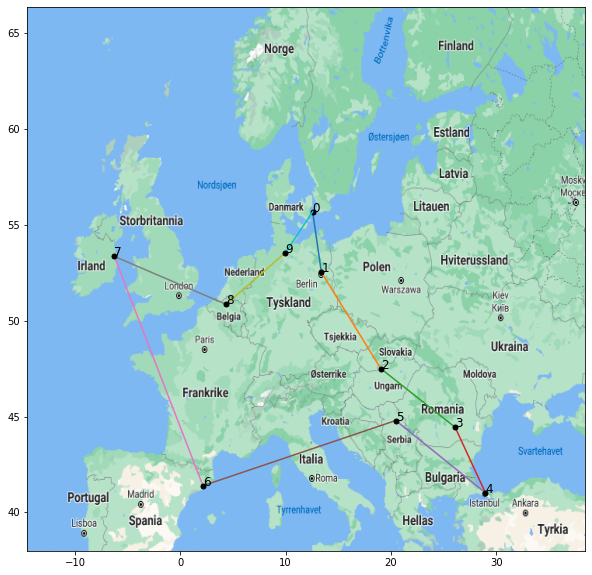

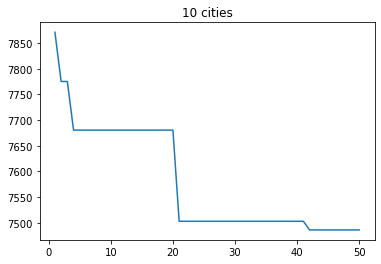

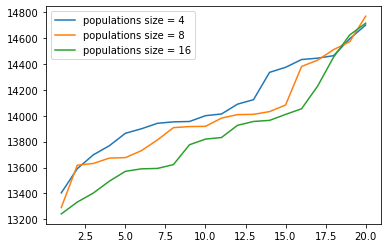

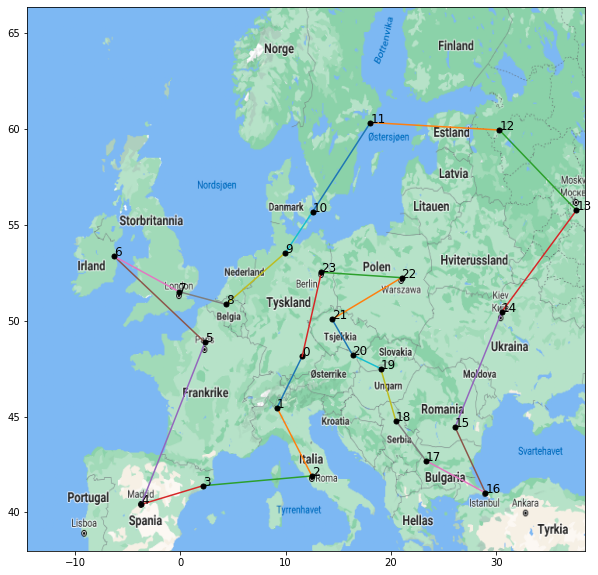

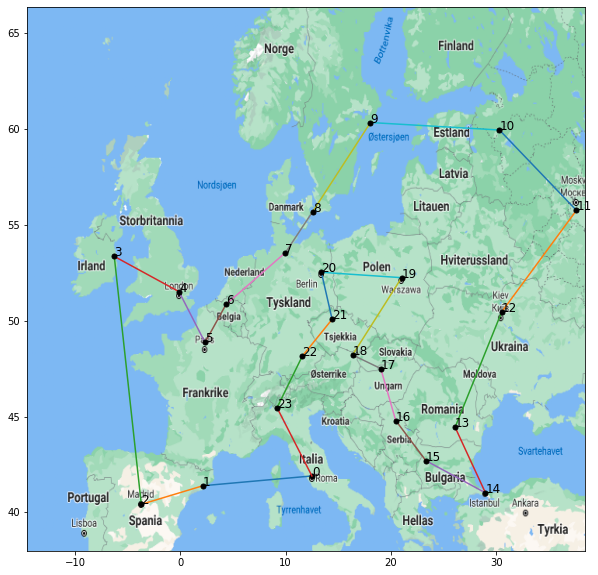

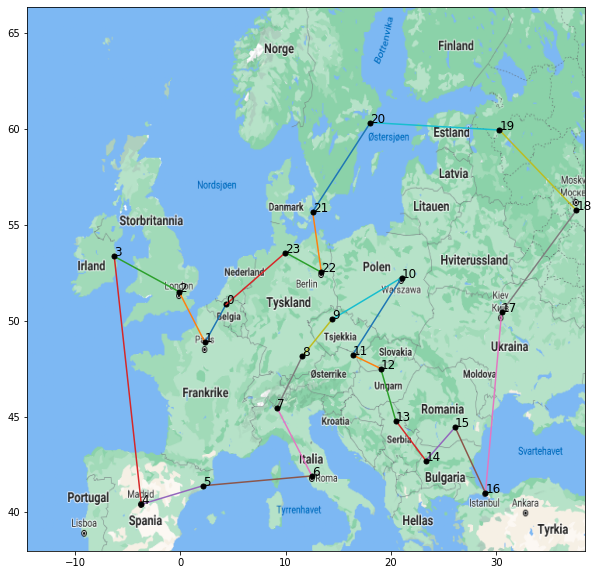

In [35]:
timetestGeneticAlgo(numb_cities = 10, mutations = 10, size = 5, numb_generations = 50, name="10 cities")


AvgDistance_list = np.sort(AvgDistance_list)
x_arr = np.linspace(1,20,20)

population_sizes = [4,8,16]
for k in range(3):
    plt.plot(x_arr, AvgDistance_list[k], label=f"populations size = {population_sizes[k]}")

plt.legend()
plt.show()

for k in range(3):
    plot_plan(bestRoute_list[k][np.argmin(BestDistance_list[k])])

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [22]:
# Answer
"""
First is an example output from the 4 different selected sizes:
for size = 4 we have:

min = 12513.66, max = 13772.900000000001, 
average = 13073.607, std = 364.1125366023535


for size = 8 we have:

min = 12287.07, max = 13855.32, 
average = 13093.9405, std = 445.3251094366343


for size = 16 we have:

min = 12428.510000000002, max = 14190.060000000003, 
average = 13080.8325, std = 417.2678137704254
"""

#Seeing as theres not much difference between 8 and 16, we can conclude from these outprints that using the parameters i set that
#approximetly 10 in population size would be fine.

"""
Among the first 10 cities my GA easily found the shortest tour, using a time of only 0.071 seconds.
This was done with parameters: numb_cities = 10, mutations = 10, size = 5, numb_generations = 50. 
A plot of the generational development can be seen in either file GA_10.png, or the plot above with name '10 cities'.

The running time of the GA is much faster than that of the exhaustive search. As stated above, for 10 cities the running time 
for GA was 0.071 seconds, while it was 2.7 seconds for exhaustive search. For 24 cities to get good results, we needed to
use parameters: numb_cities = 24, mutations = 100, numb_generations = 50. I did a time test with size=10, which from the results
we got for the different sizes should secure a decent answer. GA needed, with these parameters, a total time of 1.7 seconds, 
which also resulted in what looks to be a pretty optimized solution. This is a huge speedup compared to exhaustive search, 
which would never be able to finish.

The amount of tours inspected using my GA would vary depending on the parameters used. Using the parameters stated above, for 24
cities, we would go through 100 mutations * 10 population size * 50 generations = 50 000 total routes. ES (exhaustive search),
would need to search a total of (n-1)! = 23! routes. 
"""

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

Better algo: Distance = 13007.089999999997, time spent = 0.32353997230529785


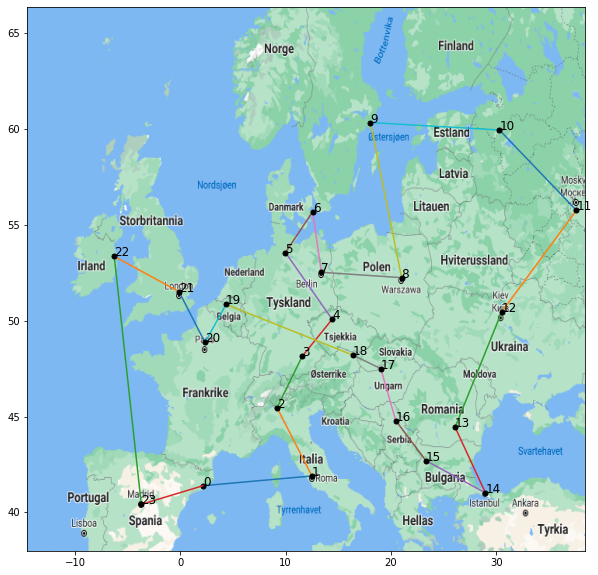

In [10]:
# Implement algorithm here
# Did some fun with hybrids even though i have IN3050, so just ignore :)


def full_mutation_Better(mutations, size, population):
    dist_list = [None]*size
    
    for i in range(size):
        currentRoute = population[i].copy()
        bestRoute = population[i].copy()
        bestDistance = calc_distance(bestRoute)
        for j in range(mutations):
            rand_city = np.random.choice(currentRoute)
            currentRoute, currentDistance = getBestNeighbour(rand_city, currentRoute)
                
            #currentDistance = calc_distance(currentRoute)
            #if-else statment to check if we want to keep our mutation or not
        bestRoute = currentRoute
        bestDistance = currentDistance    
        population[i] = bestRoute
        dist_list[i] = bestDistance
    
    return population, dist_list

#Some code for fun to make a better general algorithm
def genetic_algorithm_Better(mutations, size, city_list):
    population = [None]*size
    dist_list = [None]*size
    
    #Creating random initial solutions
    for i in range(size):
        temp_cities = city_list.copy() 
        np.random.shuffle(temp_cities)
        population[i] = temp_cities
        dist_list[i] = calc_distance(population[i])
        
    #mutation
    #population, dist_list = full_mutation_Better(mutations, size, alpha, population)
    #using pmx to make new routes:
    new_gen = True
    pmx_size = (size - size%2)
    pmx_routes = [None]*pmx_size
    #pmx_dist_list = pmx_routes.copy()
    while(new_gen):
        new_gen = False
        for i in range(0, pmx_size - 1, 2):
            pmx_routes[i], pmx_routes[i+1] = pmx_cities(population[i], population[i+1])
            
        pmx_routes, pmx_dist_list = full_mutation_Better(mutations, pmx_size, pmx_routes)
        for i in range(0, pmx_size):
            if (pmx_dist_list[i] < dist_list[i]):
                dist_list[i] = pmx_dist_list[i]
                population[i] = pmx_routes[i]
                new_gen = True
                
        shuffle_list = list(zip(population, dist_list))
        np.random.shuffle(shuffle_list)
        population, dist_list = zip(*shuffle_list)  
        population = list(population)
        dist_list = list(dist_list)
    #return population + pmx_routes, dist_list + pmx_dist_list
    return population, dist_list

def timetestGeneticAlgoBetter(numb_cities, mutations, size):
    sub_cities = cities[:numb_cities]
    start = time.time()
    routes, dist_list = genetic_algorithm_Better(mutations, size, sub_cities)
    end = time.time()
    print(f"Better algo: Distance = {np.min(dist_list)}, time spent = {end - start}")
    plot_plan(routes[np.argmin(dist_list)])

timetestGeneticAlgoBetter(24, 20, 5)